1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [64]:
import scipy
import math
from scipy import stats, optimize
import numpy as np
import pandas as pd
from scipy.stats import poisson, chi2
from scipy import stats
import matplotlib.pyplot as plt
from scipy import optimize

n=15
mean= 6.3
probability = 1- stats.poisson.cdf(n, mean)

z_score =(15 - 6.3 ) / math.sqrt(6.3)

if z_score >= 3:
    print("There is a significant difference between the number of hurricanes in 2005 and the historic average.")
else:
    print("There is no significant difference between the number of hurricanes in 2005 and the historic average.")

There is a significant difference between the number of hurricanes in 2005 and the historic average.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [71]:
from scipy import stats

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n=10

mean_diff= np.mean(post) - np.mean(pre)
std_diff= np.sqrt(((n-1)*np.var(pre, ddof=1) + (n-1)*np.var(post, ddof=1)) / (2*n - 2))
T= mean_diff / (std_diff * np.sqrt(2/n))

degrees_of_freedom = 2*n - 2
p = stats.t.cdf(T, n - 1) + (1.0 - stats.t.cdf(-T, n - 1))

print("t-statistic: ", T)
print("p-value: ", p)

if p_value > 0.05:
    print("The change in blood pressures within our sample was NOT statistically significant.")
else:
    print("The change in blood pressures within our sample was statistically significant.")


t-statistic:  3.786997938137629
p-value:  1.9956975358671354
The change in blood pressures within our sample was statistically significant.


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

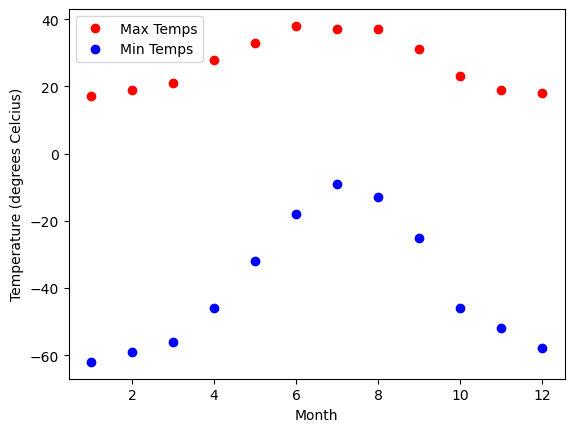

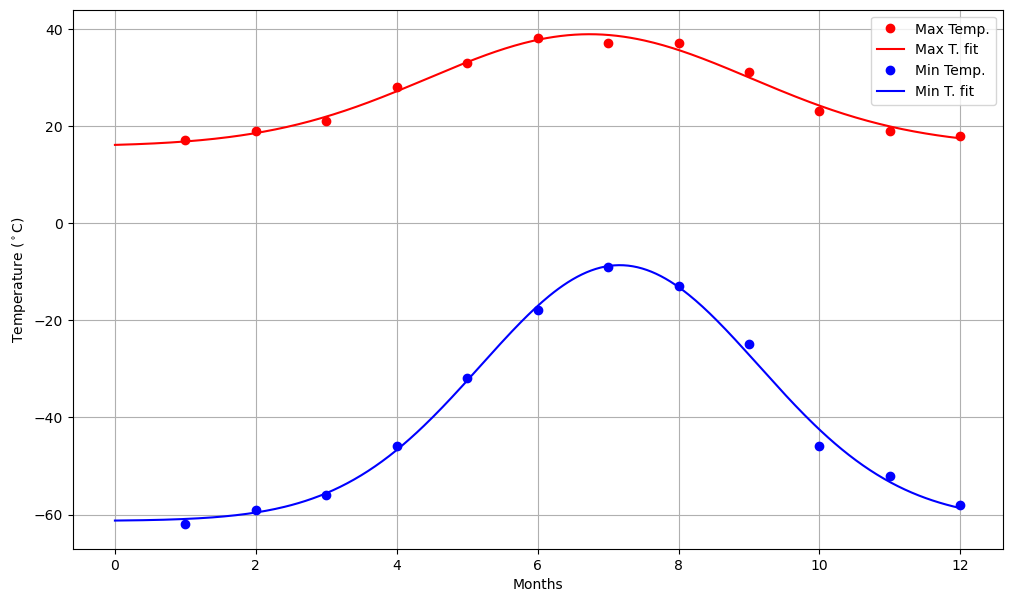

In [37]:
import matplotlib.pyplot as plt


months = range(1, 13)

max_temps = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_temps = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

plt.plot(months, max_temps, 'ro', label="Max Temps")
plt.plot(months, min_temps, 'bo', label="Min Temps", )


plt.xlabel("Month")
plt.ylabel("Temperature (degrees Celcius)")
plt.legend()

plt.show()

def gauss(x,ampl, mu, sigma, o):
    return ampl*np.exp(-(x-mu)**2/(2*sigma**2)) + o

res_max, cov_max = optimize.curve_fit(gauss, months, max_temps)
res_min, cov_min = optimize.curve_fit(gauss, months, min_temps, [50, 6, 1, -60])

days = np.linspace(0, 12, num=365)

plt.figure(figsize=(12,7))
plt.plot(months, max_temps, 'ro', label="Max Temp.")
plt.plot(days, gauss(days, *res_max), 'r-', label="Max T. fit")
plt.plot(months, min_temps, 'bo', label="Min Temp.")
plt.plot(days, gauss(days, *res_min), 'b-', label="Min T. fit")
plt.xlabel('Months')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend(loc='best')
plt.grid()
plt.show()


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


<Figure size 640x480 with 0 Axes>

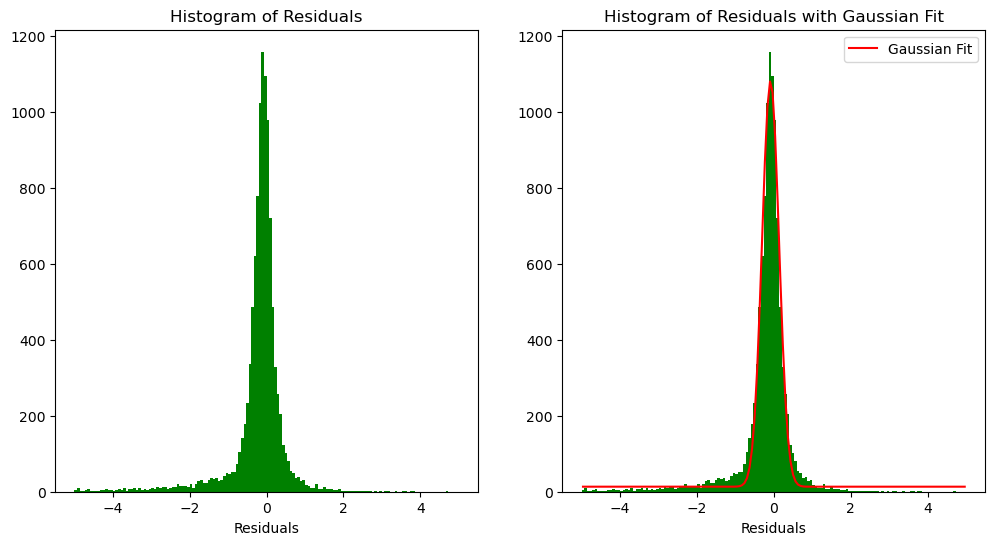

chi2 = 2360.5373130447447
p-value:  0.0
The fit is considered unsatisfactor


In [70]:
data = pd.read_pickle("residuals_261.pkl").item()
    
dataframe = pd.DataFrame(data, columns = ['residuals','distances'])
display(dataframe)

nbins = 150

plt.figure()
fig, axes = plt.subplots(1, 2 , figsize=(12, 6))
axes[0].hist(dataframe['residuals'], bins = nbins, range = (-5,5), color='green')
axes[0].set_xlabel('Residuals')
axes[0].set_title('Histogram of Residuals')

bin_heights, bin_borders, _ = plt.hist(dataframe["residuals"], bins = nbins, range = (-5,5))
bin_centers = (bin_borders[:-1] + bin_borders[1:])*0.5

poisson_uncertainty = np.sqrt(np.abs(bin_heights))

def gaussian(x, a, mu, sigma, o):
    return a*np.exp(-(x-mu)**2/(2*sigma**2)) + o

mu = np.mean(dataframe["residuals"])
sigma = np.std(dataframe["residuals"])

params, params_covariance = optimize.curve_fit(gaussian, bin_centers, bin_heights, [max(df["residuals"]), mu, sigma, 0])


axes[1].hist(dataframe["residuals"], bins = nbins, range = (-5,5), color ="green")
axes[1].plot(bin_centers, gaussian(bin_centers, *params), label = "Gaussian Fit", color ="red")
axes[1].set_xlabel('Residuals')
axes[1].set_title('Histogram of Residuals with Gaussian Fit')
axes[1].legend()
plt.show()

chi_squared = np.sum((bin_heights - gaussian(bin_centers, *params))**2 / gaussian(bin_centers, *params))
print("chi2 =", chi_squared)

ndof = nbins - 1
p_value = 1 - chi2.cdf(chi_squared, ndof)
print("p-value: ", p_value)

print("The fit is considered unsatisfactor")

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

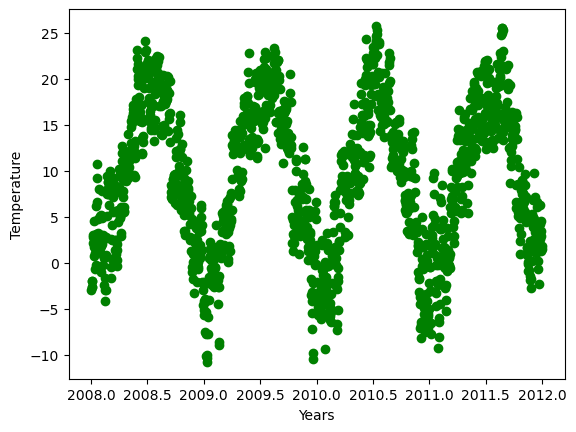

Best fit values (f function): a:  -9.962034678086361 b:  6.0485575505930305 c:  9.262821311959296


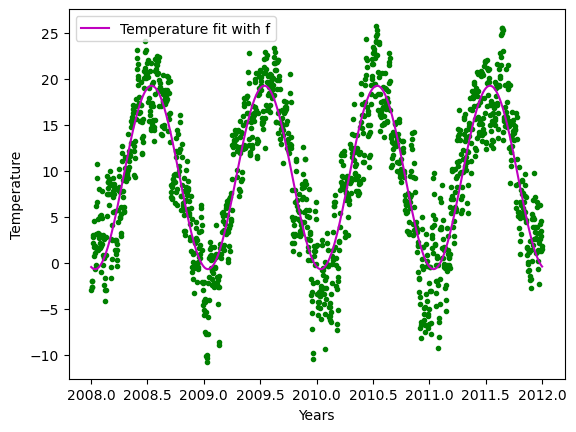

Average temperature in Munich:  9.261252084167236
Average temperature in hottest days: 24.907408333333336
Average temperature in coldest days: -9.777784

Best fit values (g function): a:  -9.960730289233492 b:  1.000293534325886 c:  8.62453097035047 d:  9.265675288369197


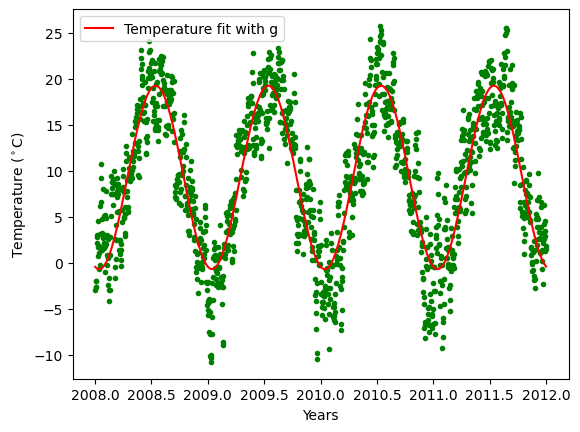

RSS of f(x):  18669.515394578364
RSS of g(x):  18669.225430813814
0.8805265886843114


In [61]:
import matplotlib.pyplot as plt
from scipy import optimize

data = np.loadtxt('munich_temperatures_average_with_bad_data.txt')
df = pd.DataFrame(data) 
df.columns = ["years", "temperatures"] 
range_df = df[(df["years"] > 2008) & (df["years"] < 2012)].reset_index()
range_df = range_df.drop(range_df[range_df["temperatures"] > 90.].index).reset_index()
year = range_df["years"].copy()
temp = range_df["temperatures"].copy()
temp_np = temp.to_numpy()
months_np = year.to_numpy()

plt.plot(months_np, temp_np, 'go')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.show()

def f(t, a, b, c):
    return a * np.cos( 2 * np.pi * t + b) + c

res_max_f, cov_max = optimize.curve_fit(f, months_np, temp_np, [a,b,c])
print("Best fit values (f function): a: ", res_max_f[0],"b: ", res_max_f[1], "c: ", res_max_f[2])

plt.figure()
plt.plot(months_np, temp_np, 'g.')
plt.plot(months_np, f(months_np, *res_max_f), 'm-', label="Temperature fit with f")
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.legend()
plt.show()

print("Average temperature in Munich: ",c)

hot_days = range_df.nlargest(12, "temperatures") 
mean_hot_days = np.mean(hot_days["temperatures"].to_numpy())
print(f"Average temperature in hottest days: {mean_hot_days}")

cold_days = range_df.nsmallest(10, "temperatures") 
mean_cold_days = np.mean(cold_days["temperatures"].to_numpy())
print(f"Average temperature in coldest days: {mean_cold_days}\n")


def g(t, a, b, c, d):
    return a * np.cos( 2 * np.pi * t * b + c) + d

res_max_g, cov_max = optimize.curve_fit(g, months_np, temp_np)
print("Best fit values (g function): a: ", res_max_g[0], "b: ", res_max_g[1], "c: ", res_max_g[2], "d: ", res_max_g[3])

plt.figure()
plt.plot(months_np, temp_np, 'g.')
plt.plot(months_np, g(months_np, *res_max_g), 'r-', label="Temperature fit with g")
plt.xlabel('Years')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()

residuals_f = temp_np - f(months_np, *res_max_f)
rss_f = np.sum(residuals_f**2)
print("RSS of f(x): ", rss_f)

residuals_g = temp_np - g(months_np, *res_max_g)
rss_g = np.sum(residuals_g**2)
print("RSS of g(x): ", rss_g)

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    return pval

fisher_test = Ftest(rss_f, rss_g, 3,4,len(months_np), True)
print(fisher_test)